**Semana 6 - MODULO 3: Data Analysis with Python (IBM)**

Nombre: *Diego Alonso Luna Ramirez*

Matricula: A01793035

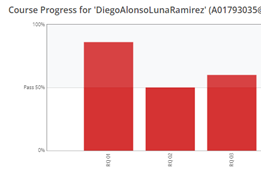

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import seaborn as sns 
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
path=os.path.join(os.getcwd(),'cars.csv')

df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df.to_csv(path)

In [2]:
# Read online
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df=df.replace('?',np.NaN)
df["price"] = df["price"].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["make"] = df["make"].astype("string")
df["fuel-type"] = df["fuel-type"].astype("string")
df["aspiration"] = df["aspiration"].astype("string")
df["num-of-doors"] = df["num-of-doors"].astype("string")
df["body-style"] = df["body-style"].astype("string")
df["drive-wheels"] = df["drive-wheels"].astype("string")
df["engine-location"] = df["engine-location"].astype("string")
df["engine-type"] = df["engine-type"].astype("string")
df["fuel-system"] = df["fuel-system"].astype("string")
df["num-of-cylinders"] = df["num-of-cylinders"].astype("string")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df.dropna(inplace=True)
df2=df.copy()

Caracteristicas de los datos.
Obtener un mayor conocimiento de los datos.
Descubrir relaciones entre variables.
Estadistica descriptiva (analisis en varianza) Correlación.

In [3]:
# Descriptive Statistics
print(df.describe()) # Print the stats of all data (numeric) use all for all types.

# Summarize categorical data
drive_wheels_counts = df["drive-wheels"].value_counts() 
drive_wheels_counts.rename({"drive-wheels":"value_counts"},inplace=True, axis=0)
drive_wheels_counts.index.name="drive-wheels"
print(drive_wheels_counts)


        symboling  normalized-losses  wheel-base      length       width  \
count  159.000000         159.000000  159.000000  159.000000  159.000000   
mean     0.735849         121.132075   98.264151  172.413836   65.607547   
std      1.193086          35.651285    5.167416   11.523177    1.947883   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  165.650000   64.000000   
50%      1.000000         113.000000   96.900000  172.400000   65.400000   
75%      2.000000         148.000000  100.800000  177.800000   66.500000   
max      3.000000         256.000000  115.600000  202.600000   71.700000   

           height  curb-weight  engine-size        bore      stroke  \
count  159.000000   159.000000   159.000000  159.000000  159.000000   
mean    53.899371  2461.138365   119.226415    3.300126    3.236352   
std      2.268761   481.941321    30.460791    0.267336    0.294888   
min     49.400000  1488.000000 

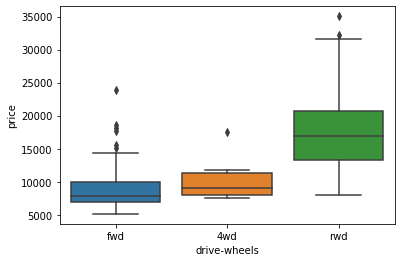

In [4]:
sns.boxplot(x="drive-wheels", y="price",data=df)

*Aquí vemos que la distribución del precio entre las diferentes categorías de ruedas motrices es diferente. Como tal, las ruedas motrices podrían potencialmente predecir el precio.*

***Estas son variables que describen una 'característica' de una unidad de datos y se seleccionan de un pequeño grupo de categorías.*** Las variables categóricas pueden tener el tipo "objeto" o "int64". Una buena manera de visualizar variables categóricas es mediante diagramas de caja.

**Relación lineal positiva**

Diagrama de dispersión de "tamaño del motor" y "precio".

A medida que aumenta el tamaño del motor, aumenta el precio: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece un indicador bastante bueno del precio, ya que la línea de regresión es casi una línea diagonal perfecta.

Podemos examinar la correlación entre 'tamaño del motor' y 'precio' y ver que es aproximadamente 0,87.

In [5]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.841496
price,0.841496,1.000000


El mpg en carretera es una variable predictiva potencial del precio. 

Diagrama de dispersión de "mpg en carretera" y "precio"

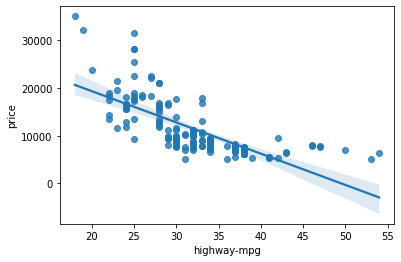

In [6]:
sns.regplot(x="highway-mpg", y="price", data=df)

A medida que aumenta el mpg en carretera, el precio baja: esto indica una relación inversa/negativa entre estas dos variables. El mpg en carretera podría ser potencialmente un predictor del precio.

Podemos examinar la correlación entre 'mpg en carretera' y 'precio' y ver que es aproximadamente -0.704.

In [7]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.00000,-0.72009
price,-0.72009,1.00000


Scatter Plot

Relación entre dos variables.
Predictor - x
Target - y

Text(0, 0.5, 'Price')

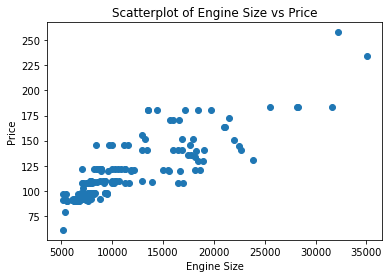

In [8]:
# Create an scatter plot
import matplotlib.pyplot as plt

y=df["engine-size"]
x=df["price"]

plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

**Análisis Estadístico Descriptivo**

La función calcula estadísticas básicas para todas las variables continuas. Cualquier valor de NaN se omite automáticamente en estas estadísticas.

Esto mostrará:

el conteo de esa variable
el significado
la desviación estándar (std)
el valor mínimo
el IQR (Rango Intercuartílico: 25%, 50% y 75%)
el valor máximo

In [9]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


**Group By:**
Usar en valores categóricos y por variables únicas o múltiples

In [10]:
# Group Data
df2=df[["drive-wheels","body-style","price"]]
df3=df2.groupby(["drive-wheels","body-style"],as_index=False).mean()
print(df3)

   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd      hardtop   8249.000000
4           fwd    hatchback   7989.800000
5           fwd        sedan   9558.120000
6           fwd        wagon   8829.222222
7           rwd  convertible  26362.500000
8           rwd      hardtop  14365.750000
9           rwd    hatchback  14918.500000
10          rwd        sedan  18318.576923
11          rwd        wagon  19282.000000


                   price                                                
body-style   convertible   hardtop hatchback         sedan         wagon
drive-wheels                                                            
4wd                  NaN       NaN    7603.0  12647.333333   9095.750000
fwd                  NaN   8249.00    7989.8   9558.120000   8829.222222
rwd              26362.5  14365.75   14918.5  18318.576923  19282.000000


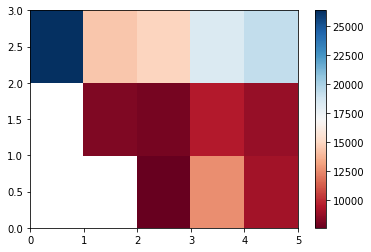

In [11]:
# Pivot table
df4=df3.pivot(index="drive-wheels",columns="body-style")
print(df4)
# Heatmaps to vizualice pivot tables
plt.pcolor(df4,cmap="RdBu")
plt.colorbar()
plt.show()

La visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Python brindan una gran libertad. Profundizaremos más en un curso separado de visualizaciones de Python.

**Análisis de Varianza:**

*Correlación entre variables categóricas.*
Puntuación de la prueba F = variación entre las medias del grupo de muestra dividida por la variación dentro del grupo de muestra.
*Valor p = grado de confianza.*

In [12]:
#Test
import scipy as spy
df5=df[["make","price"]]
df_ganova=df5.groupby(["make"])
anova_result=spy.stats.f_oneway(df_ganova.get_group("honda")["price"], df_ganova.get_group("subaru")["price"])
print(anova_result)
anova_result=spy.stats.f_oneway(df_ganova.get_group("honda")["price"], df_ganova.get_group("jaguar")["price"])
print(anova_result)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
F_onewayResult(statistic=126.51993543840521, pvalue=9.910636687962768e-08)


**Correlación:**
Dependencia de variables

(0.0, 39282.54353470204)

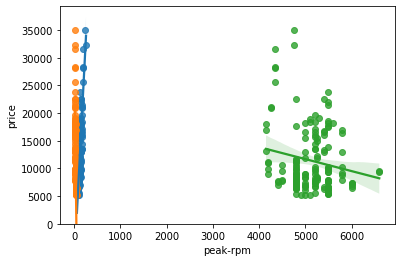

In [13]:
# Positive Correlation
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)
# Negative Correlation
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)
# Weak Correlation
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

**Correlación de Pearson:**

Correlación: una medida del grado de interdependencia entre variables.

Causalidad: la relación entre causa y efecto entre dos variables.

Es importante saber la diferencia entre estos dos. La correlación no implica causa. Determinar la correlación es mucho más simple que determinar la causalidad, ya que la causalidad puede requerir una experimentación independiente.

correlación de Pearson

La Correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

1: Correlación lineal positiva perfecta.
0: Sin correlación lineal, lo más probable es que las dos variables no se afecten entre sí.
-1: Correlación lineal negativa perfecta.
La correlación de Pearson es el método predeterminado de la función "corr". Como antes, podemos calcular la Correlación de Pearson de las variables 'int64' o 'float64'.

In [14]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized-losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel-base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb-weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine-size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


¿Cuál es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significación de 0,05, lo que significa que tenemos un 95 % de confianza en que la correlación entre las variables es significativa.

Por convención, cuando el

El valor p es 0,001: decimos que hay pruebas sólidas de que la correlación es significativa.
el valor p es 0,05: existe evidencia moderada de que la correlación es significativa.
el valor p es 0.1: hay evidencia débil de que la correlación es significativa.
el valor p es 0,1: no hay evidencia de que la correlación sea significativa.
Podemos obtener esta información usando el módulo "stats" en la biblioteca "scipy".

 Pearson:  0.7598739453800998
 P-Value:  3.592251547712681e-31


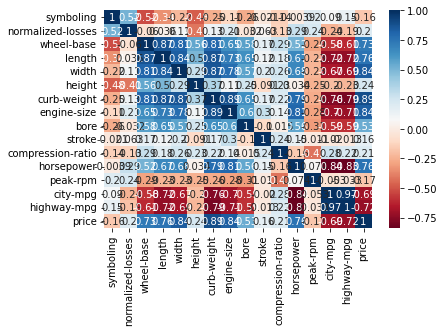

In [15]:
# Calculate Pearson Correlation
pearson,pval=spy.stats.pearsonr(df["horsepower"], df["price"])
print(" Pearson: ", pearson)
print(" P-Value: ", pval)

# Heatmap
ax=sns.heatmap(df.corr(method='pearson'), cmap='RdBu',annot=True)
plt.show()

In [16]:
# Calculate Correlation
print(df.corr())

# Get unique values of a categorical variable
print(df['drive-wheels'].unique())

                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.518344   -0.520591 -0.336257   
normalized-losses   0.518344           1.000000   -0.060086  0.035541   
wheel-base         -0.520591          -0.060086    1.000000  0.871534   
length             -0.336257           0.035541    0.871534  1.000000   
width              -0.219186           0.109726    0.814991  0.838338   
height             -0.475185          -0.413702    0.555767  0.499251   
curb-weight        -0.251880           0.125858    0.810181  0.871291   
engine-size        -0.109453           0.207820    0.649206  0.725953   
bore               -0.256469          -0.031558    0.578159  0.646318   
stroke             -0.021285           0.063330    0.167449  0.121073   
compression-ratio  -0.138316          -0.127259    0.291431  0.184814   
horsepower         -0.003949           0.290511    0.516948  0.672063   
peak-rpm            0.199106           0.237697   -

*Dado que el valor p es < 0,001, la correlación entre el mpg en carretera y el precio es estadísticamente significativa, y el coeficiente de alrededor de -0,705 muestra que la relación es negativa y moderadamente fuerte.*